# House predictions with linear regression(turienv)

- 什么是 Turi Create？
    - Turi Create 是 Apple 开源的一款机器学习工具库, 可用于通过迁移学习, 构建对象检测、图像分类、图像相似性或活动分类功能的 ML 模型.
    - Turi Create 支持的平台包括 macOS 10.12+, Linux (with glibc 2.12+), Windows 10 (via WSL)

In [11]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils
import seaborn as sns
sns.set()

SFrame，是一种新形态的dataframe

In [5]:
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /home/jamie/learngit/Machine_learning/grokking_ml_book/Chapter_3_Linear_Regression/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.018215 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jamie/learngit/Machine_learning/grokking_ml_book/Chapter_3_Linear_Regression/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.01044 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


In [34]:
data.column_names() # 获取列名列表

['Price',
 'Area',
 'Location',
 'No. of Bedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']

### Exploring the relationship between price and area
探索变量之间的关系

sframe 没办法用 seaborn `sns.pairplot(df[numerical])` 绘制散点图矩阵（scatterplot matrix）

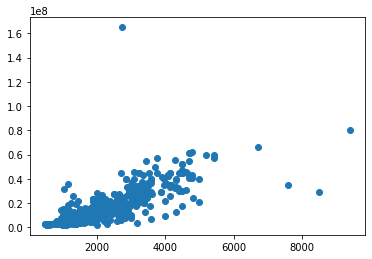

In [8]:
# 价格与面积
plt.scatter(data['Area'], data['Price'])

In [37]:
# 区域与价格
tc.visualization.box_plot(data['Location'], data['Price'],'Location','Price','Location-Price')

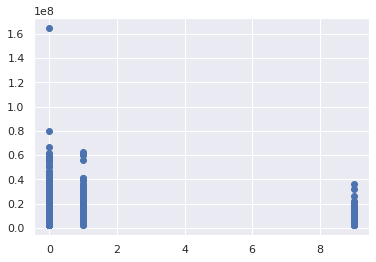

In [17]:
plt.scatter(data['MaintenanceStaff'], data['Price'])

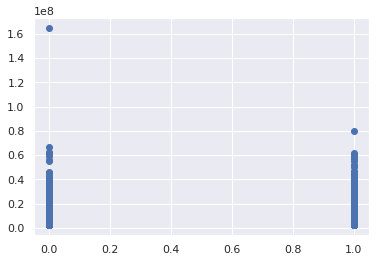

In [18]:
plt.scatter(data['Resale'], data['Price'])

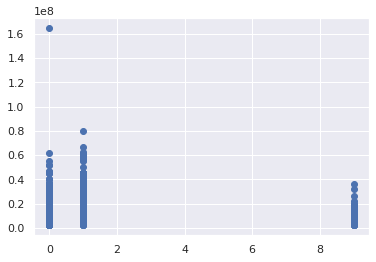

In [19]:
plt.scatter(data['Gymnasium'], data['Price'])

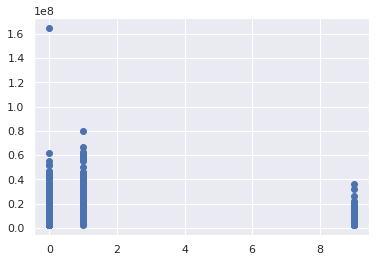

In [20]:
plt.scatter(data['SwimmingPool'], data['Price'])

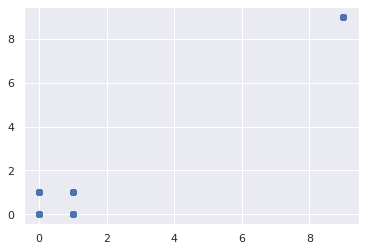

In [21]:
plt.scatter(data['SwimmingPool'], data['LandscapedGardens'])

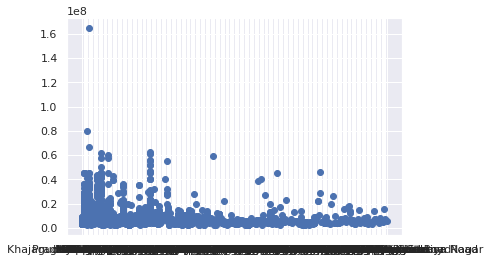

In [22]:
plt.scatter(data['Location'], data['Price'])

### Building a model that uses all the features
构建基于单变量的线性回归模型

- 训练模型，Turi Create 只需要一行
    - 单变量的简单模型 `tc.linear_regression.create(data, features=['Area'], target='Price')`
    - 多变量的复杂模型 `model = tc.linear_regression.create(data, target='Price')`

- 预测结果
    - 单变量的简单模型
    
        ```house = tc.SFrame({'Area':[1000]})
         model.predict(house) ```

In [23]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.001253     | 144385669.007817   | 21221728.334626      | 4955964.181221                  | 3773864.142212                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [24]:
simple_model.coefficients

name,index,value,stderr
(intercept),None,-6244402.398091614,245299.3326291537
Area,None,9766.812141917886,135.50998194340855


In [25]:
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

slope: 9766.812141917886
y-intercept: -6244402.398091614


In [40]:
simple_model.evaluate(data)

{'max_error': 144385669.00781742, 'rmse': 4903589.9721555635}

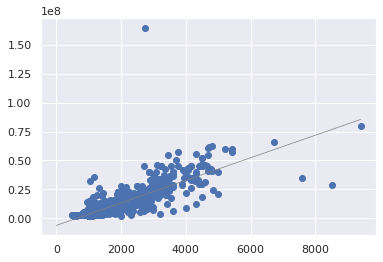

In [26]:
plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

#### 用该模型预测

预测结果之和单变量有关

In [28]:
house = tc.SFrame({'Area':[1000]})
simple_model.predict(house)

dtype: float
Rows: 1
[3522409.743826272]

In [29]:
house2 = tc.SFrame({'Area':[1000],'No. of Bedrooms':[3]})
simple_model.predict(house2)

dtype: float
Rows: 1
[3522409.743826272]

### Building a model that uses all the features
构建基于多个变量的线性回归模型

In [42]:
model = tc.linear_regression.create(data, features=['Location','Area'],  target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 239

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.005023     | 142793745.941387   | 38905311.325833      | 4317417.116856                  | 4583442.207749                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [39]:
model.coefficients

name,index,value,stderr
(intercept),None,-4913342.370641831,365213.4465702554
Location,Hitech City,5134461.425707156,530716.0089840466
Location,Manikonda,-36868.76448249496,468404.3161900462
Location,Alwal,-261668.90599424424,848977.9155288098
Location,Kukatpally,2007696.9009541015,433510.1049551747
Location,Gachibowli,2558694.0485188765,529468.4421562107
Location,Tellapur,-1100073.9788481675,634069.450306455
Location,Kokapet,732158.7822961283,526717.772720667
Location,Hyder Nagar,1701813.1226584807,1556269.6325285658
Location,Mehdipatnam,73632.50611086395,1125800.2364094153


In [ ]:
plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

In [41]:
model.evaluate(data)

{'max_error': 144779866.09571192, 'rmse': 4334269.548366947}

In [46]:
house2 = tc.SFrame({'Area': [1000], 'Location':['Hitech City']})
model.predict(house2)

dtype: float
Rows: 1
[7885152.863653729]

In [47]:
house3 = tc.SFrame({'Area': [1000], 'Location':['Alwal']})
model.predict(house3)

dtype: float
Rows: 1
[2910107.708071308]